<a href="https://colab.research.google.com/github/dushyantmaharshi/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1  =graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the data 
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/default of credit card clients.csv')

In [4]:
# First Look of the data 
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## **Data Description**

## *The following data is of 6 months i.e from Arpil 2005 to september 2005.*

X1:- (LIMIT_BAL) It is the amount of given credit in (NT) Dollar.

X2:- (SEX) It is a categorical feature containg the information about sex i.e Male(1) or Female(2).

X3:- (Education) It is a categorical feature containing the information about the Education status where 1  =graduate school; 2 = university; 3 = high school; 4 = others.

X4:- (Maritial Status) It is categorical feature containing the information about martial status of the customer where 1 = married; 2 = single; 3 = others.

X5:- (Age) It contains the age of the customer.

X6:- Repayment status in month of September(2005).

X7:- Repayment status in month of August(2005).

X8:- Repayment status in month of July(2005).

X9:- Repayment status in month of June(2005).

X10:- Repayment status in month of May(2005).

X11:- Repayment status in month of April(2005).



For X6 - X11( -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)



X12:- Amount Of bill statement in month of September(2005).

X13:- Amount Of bill statement in month of August(2005).

X14:- Amount Of bill statement in month of July(2005).

X15:- Amount Of bill statement in month of June(2005).

X16:- Amount Of bill statement in month of May(2005).

X17:- Amount Of bill statement in month of April(2005)

X18:- Amount of previous payment (Or amount paid) in month of September(2005).

X19:- Amount of previous payment (Or amount paid) in month of August(2005).

X20:- Amount of previous payment (Or amount paid) in month of July(2005).

X21:- Amount of previous payment (Or amount paid) in month of June(2005).

X22:- Amount of previous payment (Or amount paid) in month of May(2005).

X23:- Amount of previous payment (Or amount paid) in month of April(2005).

Making data more meaningful

In [5]:
# Renaming the columns
df.rename(columns={'Unnamed: 0' : 'ID','X1':'LIMIT_BAL', 'X2': 'SEX', 'X3':'EDUCATION', 'X4' :	'MARITAL_STATUS', 'X5' :	'AGE'},inplace=True)
df.rename(columns={'X6':'PAY_SEPT','X7':'PAY_AUG','X8':'PAY_JUL','X9':'PAY_JUN','X10':'PAY_MAY','X11':'PAY_APR'},inplace=True)
df.rename(columns={'X12':'BILL_AMT_SEPT','X13':'BILL_AMT_AUG','X14':'BILL_AMT_JUL','X15':'BILL_AMT_JUN','X16':'BILL_AMT_MAY','X17':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'X18':'PAY_AMT_SEPT','X19':'PAY_AMT_AUG','X20':'PAY_AMT_JUL','X21':'PAY_AMT_JUN','X22':'PAY_AMT_MAY','X23':'PAY_AMT_APR'},inplace=True)
# Renaming the dependent variable
df.rename(columns = {'Y' : 'Welsher'},inplace = True)

!!! Welsher:- a person who defaults a payment or debt

In [6]:
# Dropping the first row 
df.drop(0,axis = 0, inplace = True)

## Basic Data Exploration

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Welsher
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Welsher
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
df.shape

(30000, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30000 non-null  object
 1   LIMIT_BAL       30000 non-null  object
 2   SEX             30000 non-null  object
 3   EDUCATION       30000 non-null  object
 4   MARITAL_STATUS  30000 non-null  object
 5   AGE             30000 non-null  object
 6   PAY_SEPT        30000 non-null  object
 7   PAY_AUG         30000 non-null  object
 8   PAY_JUL         30000 non-null  object
 9   PAY_JUN         30000 non-null  object
 10  PAY_MAY         30000 non-null  object
 11  PAY_APR         30000 non-null  object
 12  BILL_AMT_SEPT   30000 non-null  object
 13  BILL_AMT_AUG    30000 non-null  object
 14  BILL_AMT_JUL    30000 non-null  object
 15  BILL_AMT_JUN    30000 non-null  object
 16  BILL_AMT_MAY    30000 non-null  object
 17  BILL_AMT_APR    30000 non-null  object
 18  PAY_AM

Changing the dtype as all numerical columns having dtype object 

In [11]:
#changing the dtype to int 
df = df.astype(int)

In [12]:
df =df.astype({"ID": object})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30000 non-null  object
 1   LIMIT_BAL       30000 non-null  int64 
 2   SEX             30000 non-null  int64 
 3   EDUCATION       30000 non-null  int64 
 4   MARITAL_STATUS  30000 non-null  int64 
 5   AGE             30000 non-null  int64 
 6   PAY_SEPT        30000 non-null  int64 
 7   PAY_AUG         30000 non-null  int64 
 8   PAY_JUL         30000 non-null  int64 
 9   PAY_JUN         30000 non-null  int64 
 10  PAY_MAY         30000 non-null  int64 
 11  PAY_APR         30000 non-null  int64 
 12  BILL_AMT_SEPT   30000 non-null  int64 
 13  BILL_AMT_AUG    30000 non-null  int64 
 14  BILL_AMT_JUL    30000 non-null  int64 
 15  BILL_AMT_JUN    30000 non-null  int64 
 16  BILL_AMT_MAY    30000 non-null  int64 
 17  BILL_AMT_APR    30000 non-null  int64 
 18  PAY_AM

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARITAL_STATUS,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEPT,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_MAY,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Handling Missing values

In [15]:
#Checking null values in columns 
df.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARITAL_STATUS    0
AGE               0
PAY_SEPT          0
PAY_AUG           0
PAY_JUL           0
PAY_JUN           0
PAY_MAY           0
PAY_APR           0
BILL_AMT_SEPT     0
BILL_AMT_AUG      0
BILL_AMT_JUL      0
BILL_AMT_JUN      0
BILL_AMT_MAY      0
BILL_AMT_APR      0
PAY_AMT_SEPT      0
PAY_AMT_AUG       0
PAY_AMT_JUL       0
PAY_AMT_JUN       0
PAY_AMT_MAY       0
PAY_AMT_APR       0
Welsher           0
dtype: int64

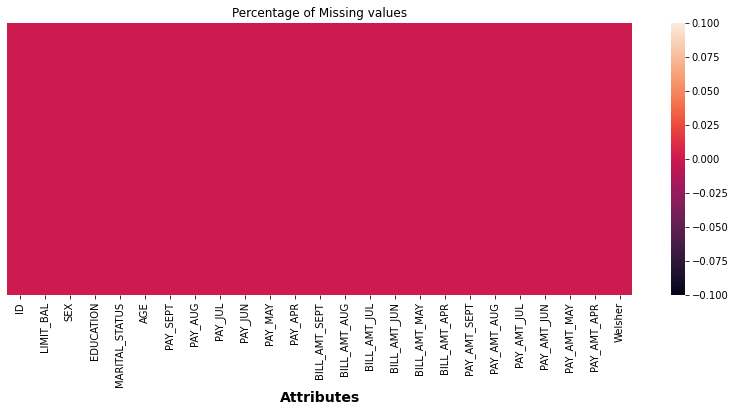

In [16]:
#PLottinh the heatmap for null values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

### Checking the Duplicataes

In [17]:
df.duplicated().sum()

0

Hurray!!! We are not having any null and duplicate values in our dataset

# **Exploratory Data Analysis**

## Dependent Variable

In [18]:
# checking the unique values of dependent variable
df['Welsher'].value_counts()

0    23364
1     6636
Name: Welsher, dtype: int64

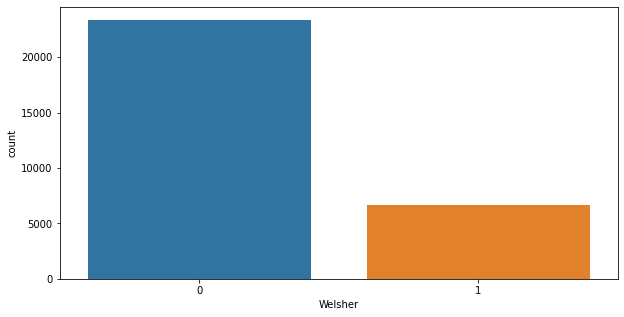

In [19]:
#plotting the count plot of Dependent variable
plt.figure(figsize=(10,5))
sns.countplot(x = 'Welsher', data = df)

## Independent Variables

## Education

In [20]:
#checking the unique values of EDUCATION column
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [21]:
#As there aren't many records in values 4,5 and 6, aggregating them to 0
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Others'),
 Text(0, 0, 'Graduate School'),
 Text(0, 0, 'University'),
 Text(0, 0, 'high school')]

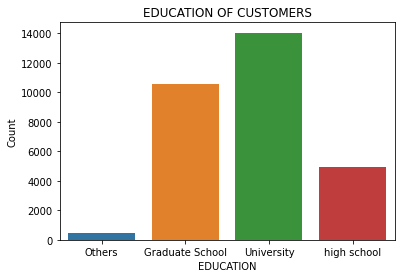

In [22]:
#plot countplot of EDUCATION
ax=sns.countplot(df['EDUCATION'])

#set title 
plt.title('EDUCATION OF CUSTOMERS')
plt.xlabel('EDUCATION')
plt.ylabel('Count')

# setting xlabels
ax.set_xticklabels(['Others', 'Graduate School', 'University', 'high school'])

## SEX

In [23]:
#checking the unique values of SEX column
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

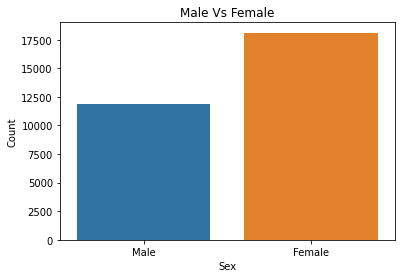

In [24]:
#Plot the countplot of SEX
ax=sns.countplot(df['SEX'])

#Set the title
plt.title('Male Vs Female')
plt.xlabel('Sex')
plt.ylabel('Count')

#set xlabels
ax.set_xticklabels(['Male', 'Female'])

### MARRIAGE

In [25]:
#checking the unique values of MARRIAGE column
df["MARITAL_STATUS"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARITAL_STATUS, dtype: int64

In [26]:
##So Again, as there aren't many records in values 0 and 3, aggregating them to 3
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].replace({0:3})
df["MARITAL_STATUS"].value_counts()

2    15964
1    13659
3      377
Name: MARITAL_STATUS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Married'), Text(0, 0, 'Single'), Text(0, 0, 'Others')]

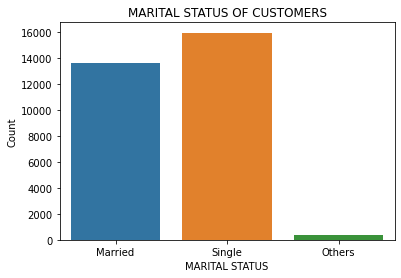

In [27]:
#Plot the countplot of MARRIAGE
ax=sns.countplot(df['MARITAL_STATUS'])

#set title and labels
plt.title('MARITAL STATUS OF CUSTOMERS')
plt.xlabel('MARITAL STATUS')
plt.ylabel('Count')

#set the x axis labels
ax.set_xticklabels(['Married', 'Single', 'Others'])

In [28]:
#Create new Dataframe for categorical variables
categorical_df = df[['SEX', 'EDUCATION', 'MARITAL_STATUS']].copy()
categorical_df['Welsher'] = df['Welsher']

#replace all values in categorical varibles with original names
categorical_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'Graduate school', 2 : 'University', 3 : 'High School', 0 : 'Others'}, 
                'MARITAL_STATUS' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

### Exploring the Delayed Payments

Delayed Payment w.r.t SEX groups

In [29]:
#percentage fucntion to show on top of bars
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12,verticalalignment='bottom')
    plt.show()


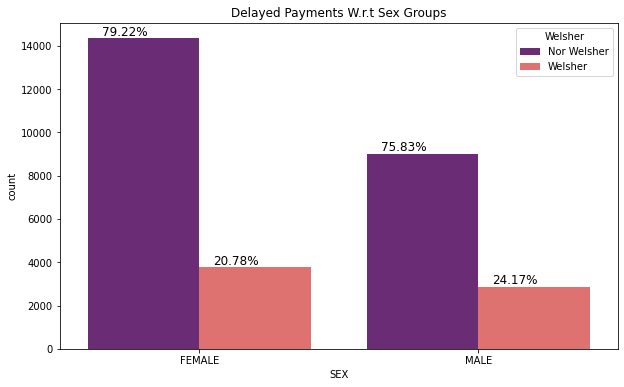

In [30]:
#Plotting sex and defaulter data in df_cat using countplot
plt.figure(figsize = (10,6))
ax = sns.countplot(x="SEX", hue="Welsher",data =categorical_df, palette='magma')
plt.title('Delayed Payments W.r.t Sex Groups')
plt.legend(title='Welsher',loc = 'upper right',labels=['Nor Welsher','Welsher'])
with_hue(ax,categorical_df.SEX,2,2)

In terms of Welshing, males and females are almost identical.

### Education Status VS Welshers

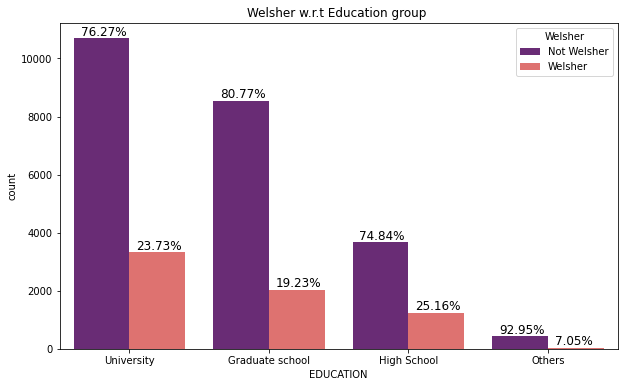

In [31]:
#ploting the count plot
plt.figure(figsize = (10,6))
ax = sns.countplot(x='EDUCATION',hue='Welsher',data=categorical_df,palette='magma')
plt.title("Welsher w.r.t Education group ")
plt.legend(title='Welsher',loc = 'upper right',labels=['Not Welsher','Welsher'])
with_hue(ax,categorical_df.EDUCATION,4,2)
plt.show()

The University students make payment defaults more as compared to other groups.

Sex and Education WRT Welshers 

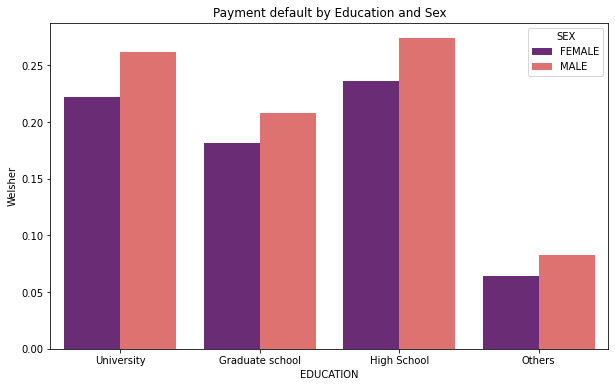

In [32]:
#ploting the data
plt.figure(figsize = (10,6))
sns.barplot(x="EDUCATION", y="Welsher", hue="SEX", data=categorical_df,palette='magma', ci=None)
plt.title("Payment default by Education and Sex")
plt.show()

Marital Status vs Welshers

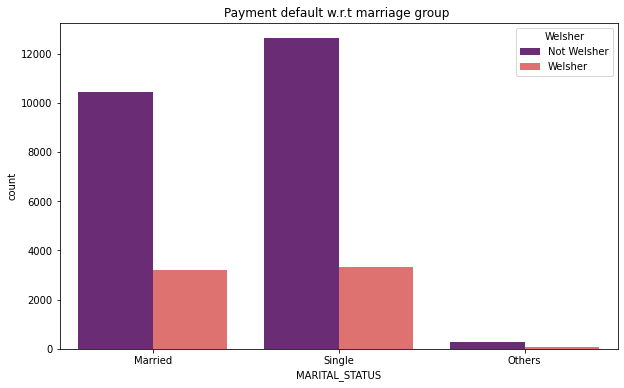

In [33]:
#ploting the data
plt.figure(figsize = (10,6))
ax = sns.countplot(x='MARITAL_STATUS',hue='Welsher',data=categorical_df,palette='magma')
plt.title("Payment default w.r.t marriage group ")
plt.legend(title='Welsher',loc = 'upper right',labels=['Not Welsher','Welsher'])
plt.show()

In Welshing, married and unmarried people are practically same.

### Credit Limit w.r.t Welshers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'LIMIT_BAL')

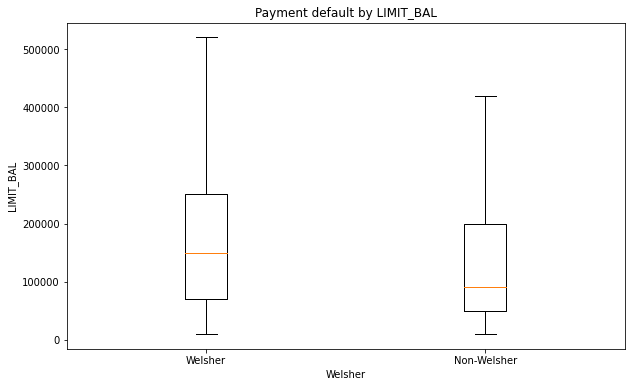

In [34]:
#create data frames for welsher and not welsher with LIMIT_BAL column
def0 = df.loc[df['Welsher'] == 0,'LIMIT_BAL']
def1 = df.loc[df['Welsher'] == 1,'LIMIT_BAL']

#plot the boxplot for default and non-default
plt.figure(figsize=(10,6))
plt.boxplot([def0, def1], labels=['Welsher', 'Non-Welsher'], showfliers=False)

#set title and axis labels
plt.title('Payment default by LIMIT_BAL')
plt.xlabel('Welsher')
plt.ylabel('LIMIT_BAL')

Customers with large credit limits have a greater rate of welshering.